Build a regression model.

In [59]:
import pandas as pd
# Import seaborn
import seaborn as sns
## Import Matplot
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)



# Load dataset
### SELECT QUERY for REGRESSION MODEL
bike_data = pd.read_csv('../data/Restaurants_bike_count.csv')

bike_data.head()


,Unnamed: 0,POI_namerating,price_corrected,rating,Total_bikes_1km
0,0,Lupo-wHTXC,3.0,4.5,2024
1,1,Le Crocodile Restaurant-GSg5v,4.0,4.5,2024
2,2,Guu Original Thurlow-XFVGG,2.0,4.0,1958
3,3,Fanny Bay Oyster Bar & Shellfish Market-Ufhxn,2.0,4.5,1898
4,4,Sushi Jin-iMtUs,3.0,4.5,1874


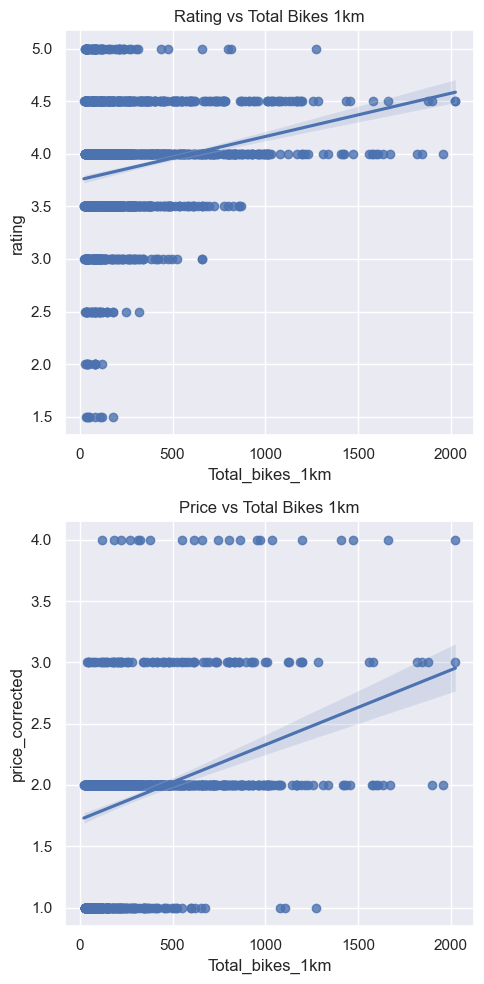

In [54]:
## Figure Layout and Aesthetic
fig, axes = plt.subplots(2,1, figsize=(5,10)) # 1 column, 2 row

## FLATTEN THE AXES if you are going to do iterations on this. 

## PLOT 1

# Apply the default theme
sns.set_theme()
sns.regplot(data=bike_data, x="Total_bikes_1km", y='rating', ax=axes[0])
axes[0].set_title('Rating vs Total Bikes 1km')

# Second subplot
sns.regplot(data=bike_data, x="Total_bikes_1km", y='price_corrected', ax=axes[1])
axes[1].set_title('Price vs Total Bikes 1km')

plt.tight_layout()

# bike_data


In [ ]:
### ADDITONAL EDA on Price and Rating
fig, axes = plt.subplots(3,3, figsize=(10,10)) # 1 column, 2 row

### Note to self - if you have a big list of charts, then it is better to FLATTEN the axes with 'axes = axes.flatten()' This means the index is a single number from 0-size of the plot matrix. 


rating_histo = sns.histplot(data=bike_data, x="rating", y='POI_namerating', ax=axes[0][1], bins=10)
# axes[0][1].set_title('Rating distribution')
# Hide y-axis labels (data labels for 'POI_namerating')
rating_histo.set_yticklabels([])

# # Set labels and title
# plt.xlabel('Price')
# plt.ylabel('')  # You can leave this empty to hide the y-axis label
# plt.title('Boxplot of Price vs. Count of POI_namerating')

# 
# # Second subplot
# sns.regplot(data=bike_data, x="Total_bikes_1km", y='price_corrected', ax=axes[1][2])
# axes[1][2].set_title('Price vs Total Bikes 1km')


Provide model output and an interpretation of the results. 

In [73]:
import statsmodels.api as sm

bike_data.describe()


,Unnamed: 0,price_corrected,rating,Total_bikes_1km
count,1552.000000,1122.000000,1552.000000,1552.000000
mean,775.500000,1.917112,3.870168,282.046392
std,448.168123,0.586262,0.586540,309.165676
min,0.000000,1.000000,1.500000,22.000000
25%,387.750000,2.000000,3.500000,80.000000
50%,775.500000,2.000000,4.000000,172.000000
75%,1163.250000,2.000000,4.125000,366.000000
max,1551.000000,4.000000,5.000000,2024.000000


## Describe Bike Data (dataframe)

![Bike_describe](../images/Bike_data_describe.png)

In [74]:
X = bike_data['Total_bikes_1km']
y = bike_data['rating']

X = sm.add_constant(X) # adding a constant
lin_reg = sm.OLS(y,X)



In [75]:
model = lin_reg.fit()
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     76.54
Date:                Sun, 24 Sep 2023   Prob (F-statistic):           5.51e-18
Time:                        10:49:07   Log-Likelihood:                -1336.3
No. Observations:                1552   AIC:                             2677.
Df Residuals:                    1550   BIC:                             2687.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               3.7541      0.020    1

## Linear Regression Analysis:

### Relationship between RATING and TotalBikes

* H0: There is NO relationship between the number of bike within a 1km radius and a restaurant/bar's Rating
* H1: The is a relationship between number of bikes and the restaurant/bar rating.

> Output:
>![linear_model_1](../images/OLS_rating_bikes.png)

**Interpretation**

Coefficient for Total_bikes_1km: 
* The coefficient value for 'Total_bikes_1km' is 0.0004 (ie the slope). 
* Implies that for every additional bike in the 1km radius, the rating is expected to increase by 0.0004, all else being equal.

Intercept (const): 
* The y-intercept or constant value is 3.7541. 
* An intercept of 3.7 means that even when the number of bikes within a 1km radius is 0, the predicted rating is 3.7541.

R-squared:
 * R<sup>2</sup> value is 0.047. 
  * This indicates that only 4.7% of the variance in 'rating' is explained by the 'Total_bikes_1km
  * The R<sup>2</sup> value is extremently low! which suggests 'Total_bikes_1km' might not be a strong predictor for 'rating'

T-score and p-value: 
* The t-score is >8, which is very large and correspondingly, the p-value is very small.
* The p-value associated with 'Total_bikes_1km' is very close to 0 (much less than 0.05).
 * This indicates that the relationship between 'rating' and 'Total_bikes_1km' is statistically significant at conventional significance levels.

**Conclusion**

As result of this linear regression model, we reject the null hypothesis. There appears to be a significant (alpha=0.05) between the number of bikes available within a 1km radius and the location rating. 

However, despite the finding, the count of total bikes is NOT a strong predictor for rating. This is supported by two observations: 
1. The y-intercept- 0 bikes available implies a rating of 3.75. Considering the scale only goes to 5, there is very little opportunity for bike count to contribute to higher ratings. 
2. The slope (coefficient) is  0.0004. For every increase in bike count, the rating increases by VERY little. Argueable, it is flat. 

# Stretch

How can you turn the regression model into a classification model?